# https://www.kaggle.com/c/digit-recognizer

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [28]:
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

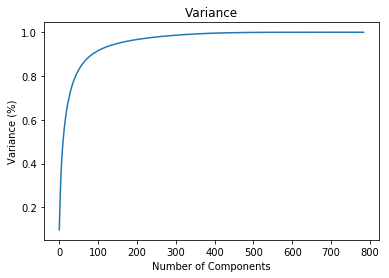

In [29]:
#https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe
pca = PCA().fit(train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Variance')
plt.show()

In [30]:
train_y = train.iloc[:, :1]
train_x = train.iloc[:, 1:]
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, random_state = 0)

In [31]:
pca = PCA(n_components = 0.8, whiten = True)
x_train = pca.fit_transform(x_train)
x_val = pca.transform(x_val)

In [32]:
svc = svm.SVC()
svc.fit(x_train, y_train)
svc.score(x_val, y_val)

0.9785714285714285

In [33]:
test_pca = pca.transform(test)
submission = pd.DataFrame()
submission['ImageId'] = test.index + 1
submission['Label'] = svc.predict(test_pca)
submission.to_csv('submission.csv', index = False)